In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/loan_customers.csv")
df.head()


,customer_id,age,income,loan_amount,tenure,employment_type,credit_score,city,default_flag
0,1,25,25000,50000,12,Contract,580,Delhi,1
1,2,35,60000,200000,24,Salaried,720,Mumbai,0
2,3,40,45000,150000,36,Business,650,Pune,0
3,4,29,30000,80000,12,Contract,590,Delhi,1
4,5,50,80000,300000,48,Salaried,780,Mumbai,0


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      200 non-null    int64 
 1   age              200 non-null    int64 
 2   income           200 non-null    int64 
 3   loan_amount      200 non-null    int64 
 4   tenure           200 non-null    int64 
 5   employment_type  200 non-null    object
 6   credit_score     200 non-null    int64 
 7   city             200 non-null    object
 8   default_flag     200 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 14.2+ KB


customer_id        0
age                0
income             0
loan_amount        0
tenure             0
employment_type    0
credit_score       0
city               0
default_flag       0
dtype: int64

In [4]:
df["credit_score"] = pd.to_numeric(df["credit_score"], errors='coerce')
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].mean())
default_rate = df["default_flag"].mean() * 100

In [5]:

df["city"] = df["city"].apply(
    lambda x: x if isinstance(x, str) and not x.strip().isdigit() else "Unknown"
)
df["city"].value_counts()


city
Delhi        43
Mumbai       37
Pune         33
Bangalore    32
Hyderabad    30
Chennai      25
Name: count, dtype: int64

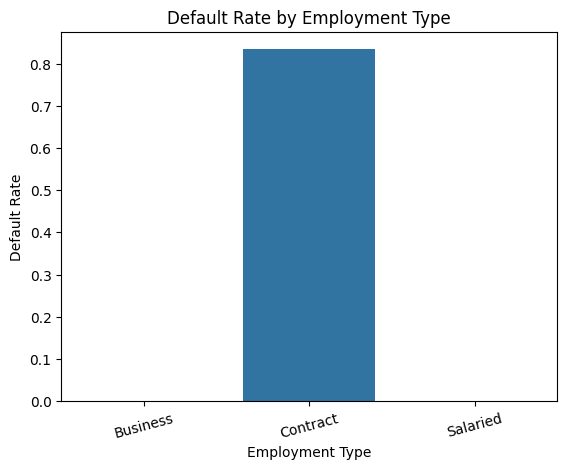

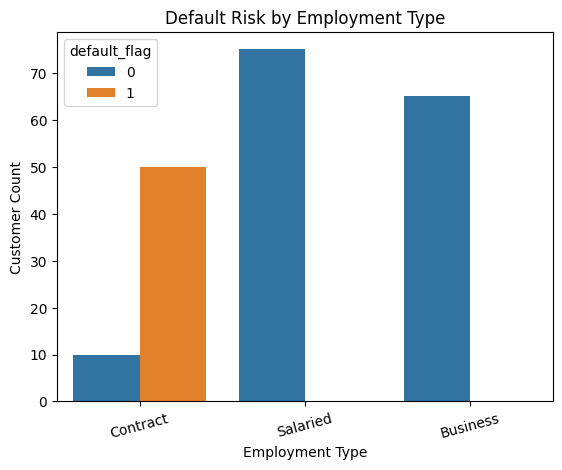

default_flag,0,1,All
employment_type,,,
Business,65,0,65
Contract,10,50,60
Salaried,75,0,75
All,150,50,200


In [6]:
emp_risk = df.groupby("employment_type")["default_flag"].mean().reset_index()

sns.barplot(x="employment_type", y="default_flag", data=emp_risk)
plt.title("Default Rate by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=15)
plt.show()

sns.countplot(x="employment_type", hue="default_flag", data=df)
plt.title("Default Risk by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=15)
plt.show()

## Show Risk Table (Numbers Behind the Chart)
pd.crosstab(df["employment_type"], df["default_flag"], margins=True)


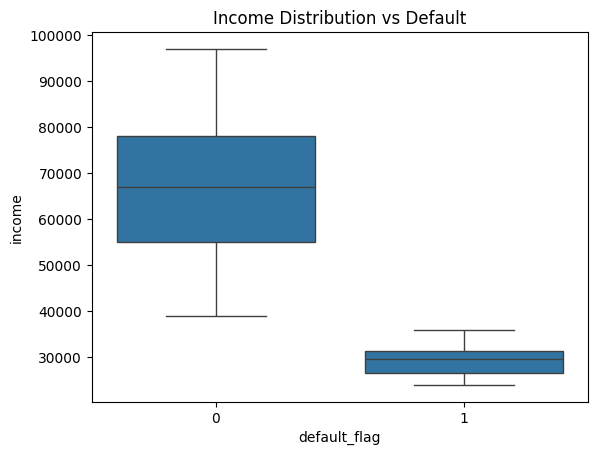

In [7]:
sns.boxplot(x="default_flag", y="income", data=df)
plt.title("Income Distribution vs Default")
plt.show()

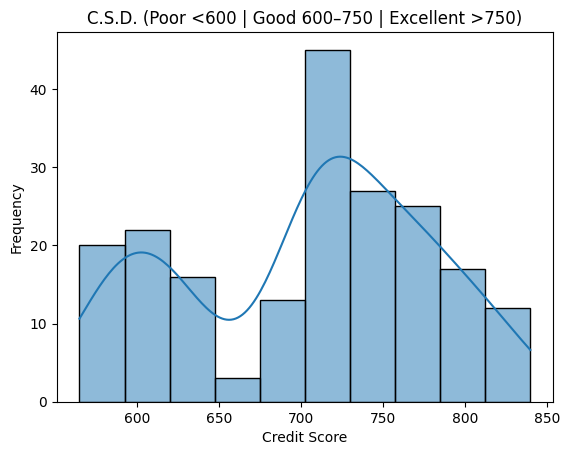

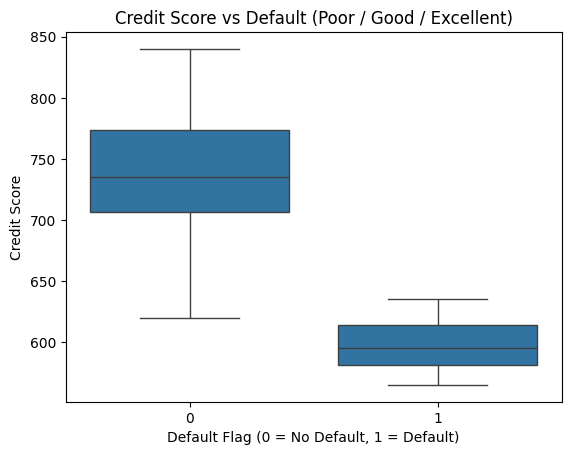

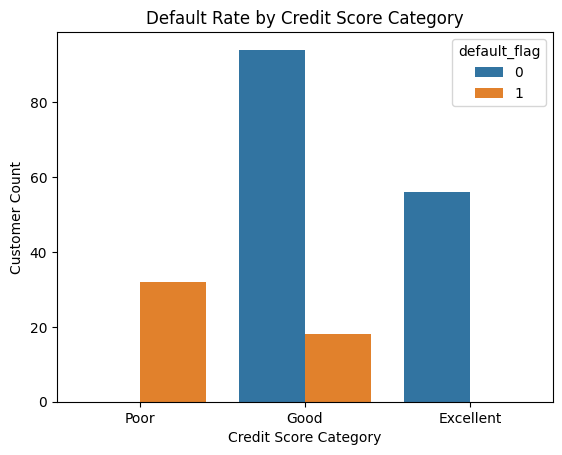

In [8]:
df["credit_score_group"] = pd.cut(
    df["credit_score"],
    bins=[0, 600, 750, 850],
    labels=["Poor", "Good", "Excellent"]
)
sns.histplot(df["credit_score"], bins=10, kde=True)
plt.title("C.S.D. (Poor <600 | Good 600–750 | Excellent >750)")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x="default_flag", y="credit_score", data=df)
plt.title("Credit Score vs Default (Poor / Good / Excellent)")
plt.xlabel("Default Flag (0 = No Default, 1 = Default)")
plt.ylabel("Credit Score")
plt.show()

sns.countplot(x="credit_score_group", hue="default_flag", data=df)
plt.title("Default Rate by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Customer Count")
plt.show()


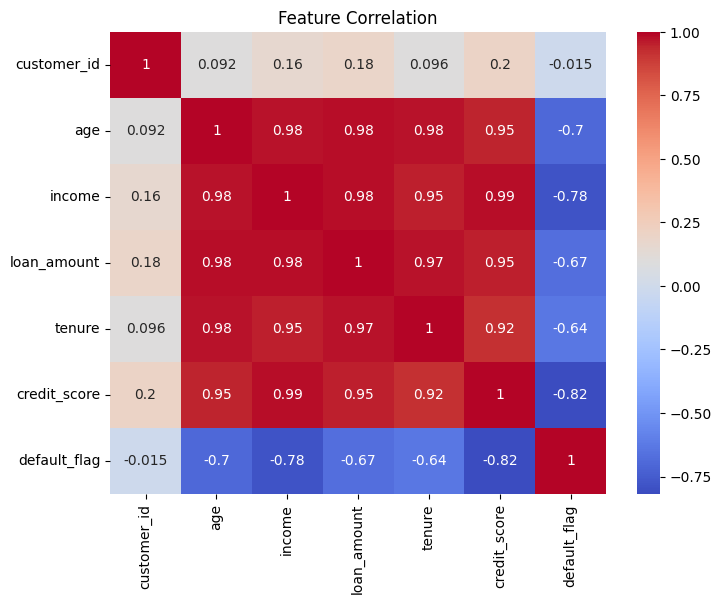

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [10]:
df["credit_score"] = pd.to_numeric(df["credit_score"], errors='coerce')
df["income"] = pd.to_numeric(df["income"], errors="coerce")

df["income_group"] = pd.cut(
    df["income"],
    bins=[0,30000,60000,100000],
    labels=["Low","Medium","High"]
)

df["risk_flag"] = np.where(df["credit_score"] < 600, "High Risk", "Low Risk")

df[["income", "income_group","credit_score","risk_flag"]].head(10)


,income,income_group,credit_score,risk_flag
0,25000,Low,580,High Risk
1,60000,Medium,720,Low Risk
2,45000,Medium,650,Low Risk
3,30000,Low,590,High Risk
4,80000,High,780,Low Risk
5,28000,Low,600,Low Risk
6,52000,Medium,710,Low Risk
7,75000,High,740,Low Risk
8,48000,Medium,680,Low Risk
9,26000,Low,575,High Risk


In [11]:
df.to_csv("../data/loan_customers_cleaned.csv", index=False)